# 파이토치 기본 문법


## 텐서 생성 및 변환

텐서는 넘파이의 ndarray와 비슷하며 GPU에서의 연산도 가능하다.

In [2]:
# 텐서 생성 및 변환
import torch
print(torch.tensor([[1,2], [3,4]]))     # 2차원 형태의 텐서 생성
# print(torch.tensor([[1,2], [3,4]], device="cuda:0"))    # GPU에 텐서 생성
print(torch.tensor([[1,2], [3,4]], dtype=torch.float64))  #dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


텐서를 ndarray로 변환하여 계산하는 것 또한 가능하다.

In [ ]:
temp = torch.tensor([[1,2], [3,4]])
print(temp.numpy())   # 텐서를 ndarray로 변환

# temp = torch.tensor([[1,2], [3,4]], device="cuda:0")
print(temp. to ("cpu").numpy()) # GPU 상의 텐서를 CPU의 텐서로 변환 후 ndarray로 변환

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


가장 기초적인 텐서의 인덱스 조작 예시이다.

더 자세한 내용은 : https://wikidocs.net/52460

In [ ]:
# 텐서의 인덱스 조작
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7]) # 1차원 벡터 생성 
print(temp[0], temp[1], temp[-1])   # 인덱스 번호로 인덱싱
print('------------------------')
print(temp[2:5], temp[4:-1])        # 슬라이싱으로 인덱싱

tensor(1.) tensor(2.) tensor(7.)
------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


typeError 조심! 텐서간의 type이 다르면 연산이 불가능하다. ex) FloatTensor & DoubleTensor

여러 텐서 타입들 : https://pytorch.org/docs/stable/tensors.html
전치 행렬, 제곱, 로그 등 더 다양한 텐서 연산 : https://statisticsplaybook.tistory.com/6

In [8]:
# 텐서 연산 
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])

print(w - v)    
print(w + v)
print(v * w)
print(v.matmul(w))    # matrix multiplicatoin

t = torch.FloatTensor([1, 2])

print(t.mean())     #mean value of the tensor

tensor([2, 2, 3])
tensor([4, 6, 9])
tensor([ 3,  8, 18])
tensor(29)
tensor(1.5000)


view() 함수로 텐서의 차원 변경 가능

In [4]:
# 텐서 차원 조작
temp = torch.tensor([
    [1, 2], [3, 4]
])

print(temp.shape)
print('------------------------')
print(temp.view(4,1))
print('------------------------')
print(temp.view(-1))
print('------------------------')
print(temp.view(1, -1))
print('------------------------')
print(temp.view(-1, 1))

torch.Size([2, 2])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])
------------------------
tensor([1, 2, 3, 4])
------------------------
tensor([[1, 2, 3, 4]])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])


## 데이터 준비

In [9]:
# 로컬 파일 불러와서 사용
import pandas as pd
import torch
data = pd.read_csv('/content/drive/MyDrive/BOAZ/분석/080289-main/chap02/data/car_evaluation.csv')

data.head()   # 데이터 정보보기 defalut = 5rows

# x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float() # CSV 파일의 x 칼럼의 값을 넘파이 배열로 받아 Tensor(dtype)으로 변환
# y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float() # y 칼럼 값 Tensor로 변환

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


torch.utils를 사용하여 커스텀 데이터셋 제작 가능

In [ ]:
# 커스텀 데이터셋 사용 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
  def __init__(self, csv_file):   # csv_file 파라미터로 데이터셋 호출
    self.label = pd.read_csv(csv_file)

  def __len__(self):    #전체 데이터셋 크기 반환
    return len(self.label)

  def __getitem__(self, idx):   # 전체 x와 y 데이터 중에 해당 idx 데이터를 가져오기
    sample = torch.tensor(self.label.iloc[idx,0.3]).int()
    label = torch.tensor(self.label.iloc[idx,3]).int()
    return sample, label 

  # tensor_dataset = CustomDataset('../covtype.csv')    # 데이터셋으로 사용할 파일
  # dataset = DataLoader(tensor_dataset, batch_size=4, shuffle=True)    #데이터셋을 torch.utils.data.DataLoader에 파라미터로 전달

In [ ]:
# 파이토치 제공 데이터셋 사용
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import requests

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])  # 평균이 0.5 표준편차가 1.0이 되도록 데이터 분포 조정

download_root = '/content/drive/MyDrive/BOAZ/분석/080289-main/chap02/data/'  #다운 받을 경로

train_dataset = MNIST(download_root, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))]), train=True, download=True)  # train 데이터셋 
test_dataset = MNIST(download_root, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))]), train=False, download=True)  # test 데이터셋
valid_dataset = MNIST(download_root, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))]), train=False, download=True) # validation 데이터셋

## 모델 정의

In [ ]:
# 단순 신경망을 정의하는 방법
import torch.nn as nn

model = nn.Linear(in_features=1, out_features=1, bias=True)

Sequential 신경망으로 모델을 정의하면 가독성이 높다는 장점이 있다.

다른 특징으로는 순차적으로 실행된다.

In [ ]:
# 모델 정의 Sequential
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))
    
    self.layer1 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True))

    def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.shape[0], -1)
      x = self.layer3(x)
      return x

model = MLP()

print(list(model.children()))
print('-------------------------------------')
print(list(model.modules()))

[Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)]
-------------------------------------
[MLP(
  (layer1): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
), Linear(in_features=750, out_features=10, bias=True), ReLU(inplace=True), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Con

함수로 모델을 정의할 경우 변수에 저장해 놓은 계층들을 **재사용**할 수 있다는 장접이 있다.

모델 자체는 복잡해질 수 있다.

In [ ]:
# 모델 정의 Functional
def MLP(in_features=1, hidden_features=20, out_features=1):
  hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
  activation = nn.ReLU()
  output = nn.Linear(in_geatures=hidden_features, out_features=out_features, bias=True)
  net = nn.Sequential(hidden, activation, output)
  return net

## 모델 파라미터 정의

In [ ]:
# 모델 파라미터 정의
import torch
from torch.optim import optimizer
criterion = torch.nn.MSELoss()    # Loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Optimizer : learning rate, optimizing method
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 0.95 ** epoch) # 미리 지정한 에포크 횟수를 지날 때 마다 학습을 조정하는 기법

## 모델 훈련

In [ ]:
# 모델 훈련
for epoch in range(100):
  yhat = model(train_dataset)
  loss = criterion(yhat, test_dataset)
  optimizer.zero.grad()   # 기울기 초기화!
  loss.backward()   # 역전파 학습!
  optimizer.step()  # 기울기 업데이트

TypeError: ignored

## 모델 평가

In [ ]:
# 모델 평가
!pip install torchmetrics
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10,))

acc = torchmetrics.functional.accuracy(preds, target)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

# 파이토치 코드 맛보기

In [ ]:
# 라이브러리 호출
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# 데이터 호출
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
dataset = pd.read_csv('car_evaluation.csv')

dataset.head()

Saving car_evaluation.csv to car_evaluation.csv


,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


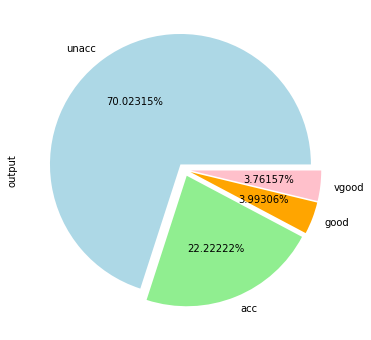

In [ ]:
# 예제 데이터셋 분포
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode = (0.05, 0.05, 0.05, 0.05))

In [ ]:
# 데이터를 범주형 타입으로 변환
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [ ]:
# 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [ ]:
# 레이블로 사용할 칼럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [ ]:
# 범주형 칼럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [ ]:
# 데이터셋 분리
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [ ]:
# 데이터셋 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [ ]:
# 모델의 네트워크 생성
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        
        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols 

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

In [ ]:
# Model 클래스의 객체 생성
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(4, 2)
    (2): Embedding(4, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [ ]:
# 모델의 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# CPU/GPU 사용 지정
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')


In [ ]:
# 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.54971838
epoch:  26 loss: 1.38262212
epoch:  51 loss: 1.28794491
epoch:  76 loss: 1.19675422
epoch: 101 loss: 1.05444801
epoch: 126 loss: 0.93854618
epoch: 151 loss: 0.82051063
epoch: 176 loss: 0.72816724
epoch: 201 loss: 0.68836898
epoch: 226 loss: 0.66823268
epoch: 251 loss: 0.62293482
epoch: 276 loss: 0.60307342
epoch: 301 loss: 0.59770316
epoch: 326 loss: 0.59638292
epoch: 351 loss: 0.59306866
epoch: 376 loss: 0.57537627
epoch: 401 loss: 0.57661194
epoch: 426 loss: 0.56588101
epoch: 451 loss: 0.57447720
epoch: 476 loss: 0.57792795
epoch: 500 loss: 0.5705714226


In [ ]:
# 테스트 데이터셋으로 모델 예측
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data).to(device)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.57364231


In [ ]:
# 모델의 예측 확인
print(y_val[:5])

tensor([[ 2.9799,  1.7294, -3.8247, -3.7761],
        [ 2.8781,  1.5216, -3.7913, -3.7414],
        [ 2.1966,  1.0520, -3.1466, -3.1257],
        [ 2.5713,  1.4888, -3.4133, -3.3172],
        [ 1.8492,  1.0360, -2.6611, -2.4534]])


In [ ]:
# 가장 큰 값을 갖는 인덱스 확인
y_val = np.argmax(y_val.cpu().numpy(), axis=1)
print(y_val[:5])

[0 0 0 0 0]


In [ ]:
# 테스트 데이터 셋으로 정확도 확인
import warnings
warnings.filterwarnings('ignore') 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_outputs=test_outputs.cpu().numpy()
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[259   0]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       1.00      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.88      0.51      0.44       345
weighted avg       0.81      0.75      0.65       345

0.7536231884057971
